In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import torch
from torchvision.datasets.cifar import CIFAR100
from torch.utils.data import DataLoader
import torchvision.transforms as transforms
import gc 
from torchvision.datasets import MNIST, FashionMNIST, SVHN, CIFAR10

def tmp_func(x):
    return x.repeat(3, 1, 1)

mnist =MNIST(
            root=r"/dataset/MNIST",
            train=True,
            download=True,
            transform=transforms.Compose(
                    [
                transforms.ToTensor(),

                    ]
                ))


loader = DataLoader(
    mnist,
    batch_size=10,
    num_workers=1,
    shuffle=False
)

nimages = 0
mean = 0.
std = 0.
for batch, _ in loader:
    # Rearrange batch to be the shape of [B, C, W * H]
    batch = torch.unsqueeze(batch, 1)
    batch = batch.view(batch.size(0), batch.size(1), -1)
    # Update total number of images
    nimages += batch.size(0)
    # Compute mean and std here
    mean += batch.mean(2).sum(0) 
    std += batch.std(2).sum(0)

# Final step
mean /= nimages
std /= nimages

print(mean)
print(std)

tensor([0.1307])
tensor([0.3015])


In [6]:
img,_ = next(iter(loader))
img.shape

torch.Size([10, 1, 28, 28])

In [4]:
print(mean, std)

tensor([0.1307]) tensor([0.3015])


In [5]:
FashionM =FashionMNIST(
            root=r"/dataset/FashionMNIST",
            train=True,
            download=True,
            transform=transforms.Compose(
                    [
                transforms.ToTensor(),
                    ]
                ))

loader = DataLoader(
    FashionM,
    batch_size=10,
    num_workers=1,
    shuffle=False
)


nimages = 0
mean = 0.
std = 0.
for batch, _ in loader:
    # Rearrange batch to be the shape of [B, C, W * H]
    batch = batch.view(batch.size(0), batch.size(1), -1)
    # Update total number of images
    nimages += batch.size(0)
    # Compute mean and std here
    mean += batch.mean(2).sum(0) 
    std += batch.std(2).sum(0)

# Final step
mean /= nimages
std /= nimages

print(mean)
print(std)



tensor([0.2860])
tensor([0.3205])


In [8]:
CIFAR100_data = CIFAR100(
            root=r"/dataset/CIFAR100",
            train=True,
            download=True,
            transform=transforms.ToTensor(),
        )

loader = DataLoader(
    CIFAR100_data,
    batch_size=10,
    num_workers=1,
    shuffle=False
)


nimages = 0
mean = 0.
std = 0.
for batch, _ in loader:
    # Rearrange batch to be the shape of [B, C, W * H]
    batch = batch.view(batch.size(0), batch.size(1), -1)
    # Update total number of images
    nimages += batch.size(0)
    # Compute mean and std here
    mean += batch.mean(2).sum(0) 
    std += batch.std(2).sum(0)

# Final step
mean /= nimages
std /= nimages

print(mean)
print(std)



Files already downloaded and verified
tensor([0.5071, 0.4865, 0.4409])
tensor([0.2009, 0.1984, 0.2023])


In [10]:
cifar10 =CIFAR10(
            root=r"/dataset/CHIFAR10/",
            train=True,
            download=True,
            transform=transforms.Compose(
                    [
                transforms.ToTensor(),
                transforms.Grayscale(3)
                    ]
                ))


loader = DataLoader(
    cifar10,
    batch_size=10,
    num_workers=1,
    shuffle=False
)

nimages = 0
mean = 0.
std = 0.
for batch, _ in loader:
    # Rearrange batch to be the shape of [B, C, W * H]
    batch = batch.view(batch.size(0), batch.size(1), -1)
    # Update total number of images
    nimages += batch.size(0)
    # Compute mean and std here
    mean += batch.mean(2).sum(0) 
    std += batch.std(2).sum(0)

# Final step
mean /= nimages
std /= nimages

print(mean)
print(std)

Files already downloaded and verified
tensor([0.4808, 0.4808, 0.4808])
tensor([0.1963, 0.1963, 0.1963])


In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
from robust_active_learning.data.datamanager import Data_manager
from robust_active_learning.data.datahandler_for_array import create_dataloader
from robust_active_learning.data.deprecated.datahandler_for_array import create_dataloader as create_dataloader_old
from robust_active_learning.data.deprecated.datamanager import get_datamanager as get_datamanager_old
from robust_active_learning.data.deprecated.sampler import DDU_sampler as DDU_sampler_old

In [27]:
import ssl

ssl._create_default_https_context = ssl._create_unverified_context

In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import torch
from torchvision.datasets.cifar import CIFAR100

import torchvision.transforms as transforms

from torchvision.datasets import MNIST, FashionMNIST, SVHN, CIFAR10
from torch.utils.data import Subset, ConcatDataset
import copy

def data_loader(datasets_list: list, grayscale=False) -> dict:
    """
    This function takes in a list of datasets to be used in the experiments
    """
    print(f"INFO ------ List of datasets being loaded are {datasets_list}")

    datasets_dict = {}
    if "CIFAR10" in datasets_list:
        if not grayscale:
            cifar_train_transform = transforms.Compose(
                [
                    transforms.ToTensor(),
                    transforms.RandomHorizontalFlip(),
                    transforms.RandomCrop(32, 4),
                ]
            )
            cifar_test_transform = transforms.Compose(
                [
                    transforms.ToTensor(),
                ]
            )
        else:
            cifar_train_transform = transforms.Compose(
                [
                    transforms.ToTensor(),
                    transforms.Grayscale(3),
                    transforms.RandomHorizontalFlip(),
                    transforms.RandomCrop(32, 4),
                ]
            )
            cifar_test_transform = transforms.Compose(
                [
                    transforms.ToTensor(),
                    transforms.Grayscale(3),
                ]
            )
        datasets_dict["CIFAR10_train"] = CIFAR10(
            root=r"/dataset/CHIFAR10/",
            train=True,
            download=True,
            transform=cifar_train_transform,
        )
        datasets_dict["CIFAR10_test"] = CIFAR10(
            root=r"/dataset/CHIFAR10/",
            train=False,
            download=True,
            transform=cifar_test_transform,
        )

        print("INFO ----- Dataset Loaded : CIFAR10")
        datasets_list.remove("CIFAR10")

    if "MNIST" in datasets_list:
        mnist_transforms = transforms.Compose(
            [
                transforms.Pad(2),
                transforms.ToTensor(),
                transforms.Lambda(tmp_func),
                transforms.RandomCrop(32, 4),
            ]
        )
        datasets_dict["MNIST_train"] = MNIST(
            root=r"/dataset/MNIST",
            train=True,
            download=True,
            transform=mnist_transforms,
        )

        datasets_dict["MNIST_test"] = MNIST(
            root=r"/dataset/MNIST",
            train=False,
            download=True,
            transform=mnist_transforms,
        )

        print("INFO ----- Dataset Loaded : MNIST")
        datasets_list.remove("MNIST")

    if "FashionMNIST" in datasets_list:
        fmnist_transforms = transforms.Compose(
            [
                transforms.Pad(2),
                transforms.ToTensor(),
                transforms.Lambda(tmp_func),
                transforms.RandomHorizontalFlip(),
                transforms.RandomCrop(32, 4),
            ]
        )

        datasets_dict["FashionMNIST_train"] = FashionMNIST(
            root="/dataset/FashionMNIST",
            train=True,
            download=True,
            transform=fmnist_transforms,
        )

        datasets_dict["FashionMNIST_test"] = FashionMNIST(
            root="/dataset/FashionMNIST",
            train=False,
            download=True,
            transform=fmnist_transforms,
        )

        print("INFO ----- Dataset Loaded : FashionMNIST")
        datasets_list.remove("FashionMNIST")

    if "SVHN" in datasets_list:
        SVHN_transforms = transforms.Compose(
            [transforms.ToTensor(), transforms.Resize(32), transforms.RandomCrop(32, 4)]
        )

        datasets_dict["SVHN_train"] = SVHN(
            root=r"/dataset/SVHN",
            split="train",
            download=True,
            transform=SVHN_transforms,
        )
        datasets_dict["SVHN_train"].targets = datasets_dict["SVHN_train"].labels
        datasets_dict["SVHN_test"] = SVHN(
            root=r"/dataset/SVHN",
            split="test",
            download=True,
            transform=SVHN_transforms,
        )

        datasets_dict["SVHN_test"].targets = datasets_dict["SVHN_test"].labels
        print("INFO ----- Dataset Loaded : SVHN")
        datasets_list.remove("SVHN")

    if "CIFAR100" in datasets_list:
        datasets_dict["CIFAR100_train"] = CIFAR100(
            root=r"/dataset/CIFAR100",
            train=True,
            download=True,
            transform=transforms.Compose(
                [
                    transforms.ToTensor(),
                    transforms.RandomHorizontalFlip(),
                    transforms.RandomCrop(32, 4),
                ]
            ),
        )

        datasets_dict["CIFAR100_test"] = CIFAR100(
            root=r"/dataset/CIFAR100",
            train=False,
            download=True,
            transform=transforms.ToTensor(),
        )

        print("INFO ----- Dataset Loaded : CIFAR100")
        datasets_list.remove("CIFAR100")

    if "CIFAR10_ood" in datasets_list:

        cifar_train_transform = transforms.Compose(
            [
                transforms.ToTensor(),
                transforms.RandomHorizontalFlip(),
                transforms.RandomCrop(32, 4),
            ]
        )
        cifar_test_transform = transforms.Compose(
            [
                transforms.ToTensor(),
            ]
        )

        datasets_dict["CIFAR10_ood_train"] = CIFAR10(
            root=r"/dataset/CHIFAR10/",
            train=True,
            download=True,
            transform=cifar_train_transform,
        )
        datasets_dict["CIFAR10_ood_test"] = CIFAR10(
            root=r"/dataset/CHIFAR10/",
            train=False,
            download=True,
            transform=cifar_test_transform,
        )

        print("INFO ----- Dataset Loaded : CIFAR10_ood")
        datasets_list.remove("CIFAR10_ood")

    if "CIFAR100_ood" in datasets_list:
        datasets_dict["CIFAR100_ood_train"] = CIFAR100(
            root=r"/dataset/CIFAR100",
            train=True,
            download=True,
            transform=transforms.Compose(
                [
                    transforms.ToTensor(),
                    transforms.RandomHorizontalFlip(),
                    transforms.RandomCrop(32, 4),
                ]
            ),
        )

        datasets_dict["CIFAR100_ood_test"] = CIFAR100(
            root=r"/dataset/CIFAR100",
            train=False,
            download=True,
            transform=transforms.ToTensor(),
        )

        print("INFO ----- Dataset Loaded : CIFAR100_ood")
        datasets_list.remove("CIFAR100_ood")

    assert (
        len(datasets_list) == 0
    ), f"Not all datasets have been loaded, datasets left : {datasets_list}"

    return datasets_dict

In [11]:
list_of_datasets = ["CIFAR100","CIFAR100_ood"]
datasets_dict = data_loader(list_of_datasets)

INFO ------ List of datasets being loaded are ['CIFAR100', 'CIFAR100_ood']
Files already downloaded and verified
Files already downloaded and verified
INFO ----- Dataset Loaded : CIFAR100
Files already downloaded and verified
Files already downloaded and verified
INFO ----- Dataset Loaded : CIFAR100_ood


In [12]:
import numpy as np 
iD_datasets = ["CIFAR100"]
subclass= {
          "do_subclass": True,
          "iD_classes": [0, 2, 3, 4, 6, 7, 8, 9, 11, 12, 13, 14, 16, 17, 18, 19, 21, 22, 23, 24, 26, 27, 28, 29, 31, 32, 33, 34, 36, 37, 38, 39, 41, 42, 43, 44, 46, 47, 48, 49, 51, 52, 53, 54, 56, 57, 58, 59, 61, 62, 63, 64, 66, 67, 
                            68, 69, 71, 72, 73, 74, 76, 77, 78, 79, 81, 82, 83, 84, 86, 87, 88, 89, 91, 92, 93, 94, 96, 97, 98, 99],
          "OoD_classes": [1, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95]
        }

dataset = "CIFAR100"
cls = set(subclass["iD_classes"])
idx_train = [
    i
    for i, val in enumerate(
        datasets_dict[dataset + "_train"].targets
    )
    if val in cls
]
idx_test = [
    i
    for i, val in enumerate(
        datasets_dict[dataset + "_test"].targets
    )
    if val in cls
]

In [46]:
idx_rand = [
    i
    for i, val in enumerate(
        rand_list
    )
    if val in cls
]

In [12]:
test = np.take(
    idx_train, datasets_dict[dataset + "_train"].targets, axis=0
)
print(len(test))
print(len(np.unique(datasets_dict[dataset + "_train"].targets)))


40000
80


In [13]:
datasets_dict[dataset + "_train"].data = np.take(
    datasets_dict[dataset + "_train"].data, idx_train,  axis=0
)
datasets_dict[dataset + "_train"].targets = np.take(
    datasets_dict[dataset + "_train"].targets, idx_train,  axis=0
)

datasets_dict[dataset + "_test"].data = np.take(
    datasets_dict[dataset + "_test"].data, idx_test,  axis=0
)
datasets_dict[dataset + "_test"].targets = np.take(
    datasets_dict[dataset + "_test"].targets, idx_test,  axis=0
).tolist()

new_labels = [
    subclass["iD_classes"].index(i) for i in subclass["iD_classes"]
]
datasets_dict[dataset + "_train"].targets = [
    new_labels[subclass["iD_classes"].index(i)]
    for i in datasets_dict[dataset + "_train"].targets
]

datasets_dict[dataset + "_test"].targets = [
    new_labels[subclass["iD_classes"].index(i)]
    for i in datasets_dict[dataset + "_test"].targets
]

In [14]:
print(len(datasets_dict[dataset + "_train"].targets))
print((np.unique(datasets_dict[dataset + "_train"].targets)))

40000
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79]


In [4]:
datasets_dict[dataset + "_test"].targets

NameError: name 'datasets_dict' is not defined

In [3]:
datamanger = Data_manager(
            iD_datasets=["CIFAR100"],
        OoD_datasets=["CIFAR100_ood"],
        labelled_size=500,
        pool_size=5000,
        OoD_ratio=0.0,
        test_iD_size=None,
        grayscale=False,
        subclass= {
          "do_subclass": True,
          "iD_classes": [0, 2, 3, 4, 6, 7, 8, 9, 11, 12, 13, 14, 16, 17, 18, 19, 21, 22, 23, 24, 26, 27, 28, 29, 31, 32, 33, 34, 36, 37, 38, 39, 41, 42, 43, 44, 46, 47, 48, 49, 51, 52, 53, 54, 56, 57, 58, 59, 61, 62, 63, 64, 66, 67, 
                            68, 69, 71, 72, 73, 74, 76, 77, 78, 79, 81, 82, 83, 84, 86, 87, 88, 89, 91, 92, 93, 94, 96, 97, 98, 99],
          "OoD_classes": [1, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95]
        }
)
datamanger.create_merged_data()
data_loader_tupel = create_dataloader(datamanger)


INFO ------ List of datasets being loaded are ['CIFAR100', 'CIFAR100_ood']
Files already downloaded and verified
Files already downloaded and verified
INFO ----- Dataset Loaded : CIFAR100
Files already downloaded and verified
Files already downloaded and verified
INFO ----- Dataset Loaded : CIFAR100_ood
40000
80
INFO ----- Total iD samples for training  40000
INFO ----- Total iD samples for testing  8000
INFO ----- Total OoD samples for training 10000
Creating New Dataset
Running Experiment without Pool
Status_manager intialised
INFO ------ Validation source not specified in config, experiment would run without validation set


In [4]:
train_loader ,_,_ = data_loader_tupel

In [5]:
sample_batch = next(iter(train_loader))

In [6]:
imgs,targets = sample_batch

In [7]:
targets

tensor([31, 39, 11, 23, 71, 41, 46, 41, 28, 72,  2, 78, 12,  4, 54, 23, 19,  4,
        58, 52, 26, 12, 65, 70, 79, 35, 66, 18, 73, 59, 74, 70, 74, 57, 31, 13,
        40,  1, 44, 67, 19, 66, 55, 16, 78, 69, 21,  7, 60,  1, 31, 15, 28, 28,
        15, 26, 71, 61, 72, 64, 14, 27,  9, 21, 38, 51, 23, 44, 37, 60, 35, 18,
        10,  6,  7, 36, 43, 49, 46, 68, 53, 50, 32, 76, 10, 64, 23, 50, 28,  0,
        37, 57, 63, 55, 52, 45, 52, 32,  6, 36, 55, 20, 30, 36, 35, 77, 34, 62,
        35, 70, 12, 27, 73,  9, 20,  6, 33, 70,  9, 69, 42, 13, 17, 77,  4, 31,
        11, 58])

In [9]:
img = imgs[0]

In [12]:
img=img.numpy()

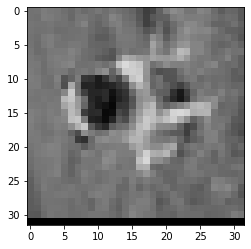

In [14]:
from matplotlib import pyplot as plt
plt.imshow(img.transpose(), interpolation='nearest')
plt.show()

In [3]:
from robust_active_learning.experiment_ddu import experiment_ddu

basic_settings = {
"oracle_stepsize": 50,
"oracle_steps": 3,
"iD": "CIFAR10",
"OoD": ["FashionMNIST", "MNIST"],
"grayscale": True,
"subclass": {
    "do_subclass": False,
    "iD_classes": [],
    "OoD_classes": []
},
"labelled_size": 2000,
"pool_size": 15000,
"OOD_ratio": 0.15,
"epochs": 100,
"batch_size": 64,
"weight_decay": 1e-4,
"metric": "accuracy",
"lr": 0.1,
"nesterov": False,
"momentum": 0.9,
"lr_sheduler": True,
"num_classes": 10,
"validation_split": 0.1,
"validation_source": "test",
"criterion": "crossentropy",
"verbose": 1
}
exp_settings = {
    "exp_type": "ddu",
    "exp_name": "ddu-cifar-015",
    "plots": False,
    "model": "DDU",
    "oracle": "ddu-sampler",
    "spectral_normalization": True,
    "temp": 1.0
}


c:\Users\nk\Python-proj\SRP\SRPHildesheim2021\.venv\lib\site-packages\setuptools\distutils_patch.py:25: UserWarning: Distutils was imported before Setuptools. This usage is discouraged and may exhibit undesirable behaviors or errors. Please use Setuptools' objects directly or at least import Setuptools first.
  warnings.warn(


In [4]:
from torch.utils.tensorboard import SummaryWriter
import time

def create_log_dirs(log_path):
    if os.path.exists(log_path) == False:
        os.makedirs(log_path)

    status_manager_path = os.path.join(log_path, "status_manager_dir")
    writer_path = os.path.join(log_path, "writer_dir")
    log_dir_path = os.path.join(log_path, "log_dir")

    if os.path.exists(status_manager_path) == False:
        os.mkdir(status_manager_path)
    if os.path.exists(writer_path) == False:
        os.mkdir(writer_path)
    if os.path.exists(log_dir_path) == False:
        os.mkdir(log_dir_path)

    print("Directories created")

log_path = os.path.join("./logs")

log_path = os.path.join(log_path, time.strftime("%m-%d-%H-%M", time.localtime()))
create_log_dirs(log_path)

writer = SummaryWriter(os.path.join(log_path, "writer_dir"))

Directories created


In [5]:
exp_ddu_old=experiment_ddu(basic_settings,exp_settings, log_path, writer)

In [6]:
exp_ddu_old.construct_datamanager()


INFO ------ List of datasets being loaded are ['CIFAR10', 'FashionMNIST', 'MNIST']
Files already downloaded and verified
Files already downloaded and verified
INFO ----- Dataset Loaded : CIFAR10
INFO ----- Dataset Loaded : MNIST
INFO ----- Dataset Loaded : FashionMNIST
INFO ----- Total iD samples for training  50000
INFO ----- Total iD samples for testing  10000
INFO ----- Total OoD samples for training 120000
initialised datamanager


AttributeError: 'Data_manager' object has no attribute 'status_manager'

In [8]:
exp_ddu_old.datamanager.create_merged_data()

Creating New Dataset
Status_manager intialised


In [10]:
exp_ddu_old.datamanager.status_manager.describe()

,inds,target,source,status
count,17000.000000,17000.000000,17000.000000,17000.000000
mean,28744.068529,8.625000,-0.500000,0.117647
std,16702.116379,2.781156,0.866051,0.322199
min,2.000000,0.000000,-1.000000,0.000000
25%,14420.250000,9.750000,-1.000000,0.000000
50%,28483.000000,10.000000,-1.000000,0.000000
75%,42823.000000,10.000000,-0.500000,0.000000
max,59997.000000,10.000000,1.000000,1.000000


In [8]:
exp_ddu_old=experiment_ddu(basic_settings,exp_settings, log_path, writer)
#exp_ddu_old.perform_experiment()

INFO ------ List of datasets being loaded are ['CIFAR10', 'FashionMNIST', 'MNIST']
Files already downloaded and verified
Files already downloaded and verified


  0%|          | 0/100 [00:00<?, ?it/s]

INFO ----- Dataset Loaded : CIFAR10
INFO ----- Dataset Loaded : MNIST
INFO ----- Dataset Loaded : FashionMNIST
INFO ----- Total iD samples for training  50000
INFO ----- Total iD samples for testing  10000
INFO ----- Total OoD samples for training 120000
initialised datamanager
loaded statusmanager from file
Using Training data to create validation dataset, size : 200

Training with device : cuda:0
Number of Training Samples :  1800
Number of Validation Samples :  200
Number of Epochs :  100
Layer (type:depth-idx)                        Param #
├─BatchNorm2d: 1-1                            32
├─Conv2d: 1-2                                 432
├─Sequential: 1-3                             --
|    └─BasicBlock: 2-1                        --
|    |    └─Conv2d: 3-1                       2,304
|    |    └─BatchNorm2d: 3-2                  32
|    |    └─Conv2d: 3-3                       2,304
|    |    └─BatchNorm2d: 3-4                  32
|    |    └─Sequential: 3-5                   --
|

  1%|          | 1/100 [00:08<13:31,  8.20s/it]

Validation loss decreased (inf --> 2.634883).  Saving model ...
Val_loss: 2.6349 Val_acc : 18.50
Train_loss: 2.0720 Train_acc : 20.83

Epoch: 2


  2%|▏         | 2/100 [00:16<13:29,  8.26s/it]

Validation loss decreased (2.634883 --> 1.912824).  Saving model ...
Val_loss: 1.9128 Val_acc : 30.50
Train_loss: 1.8522 Train_acc : 29.17

Epoch: 3


  3%|▎         | 3/100 [00:24<13:07,  8.12s/it]

Validation loss decreased (1.912824 --> 1.839704).  Saving model ...
Val_loss: 1.8397 Val_acc : 34.00
Train_loss: 1.7516 Train_acc : 33.83

Epoch: 4


  4%|▍         | 4/100 [00:32<12:54,  8.07s/it]

Validation loss decreased (1.839704 --> 1.745342).  Saving model ...
Val_loss: 1.7453 Val_acc : 37.00
Train_loss: 1.6788 Train_acc : 36.61

Epoch: 5


  5%|▌         | 5/100 [00:41<13:19,  8.42s/it]

EarlyStopping counter: 1 out of 10
Val_loss: 1.9560 Val_acc : 28.00
Train_loss: 1.6484 Train_acc : 39.06

Epoch: 6


  6%|▌         | 6/100 [00:49<13:11,  8.42s/it]

EarlyStopping counter: 2 out of 10
Val_loss: 1.7810 Val_acc : 35.00
Train_loss: 1.6705 Train_acc : 37.11

Epoch: 7


  7%|▋         | 7/100 [00:58<13:05,  8.44s/it]

EarlyStopping counter: 3 out of 10
Val_loss: 1.8338 Val_acc : 35.00
Train_loss: 1.6093 Train_acc : 39.06

Epoch: 8


  8%|▊         | 8/100 [01:07<13:03,  8.51s/it]

EarlyStopping counter: 4 out of 10
Val_loss: 1.8451 Val_acc : 34.50
Train_loss: 1.5849 Train_acc : 42.22

Epoch: 9


  9%|▉         | 9/100 [01:15<13:01,  8.59s/it]

Validation loss decreased (1.745342 --> 1.588664).  Saving model ...
Val_loss: 1.5887 Val_acc : 42.50
Train_loss: 1.4872 Train_acc : 44.33

Epoch: 10


 10%|█         | 10/100 [01:24<12:49,  8.55s/it]

EarlyStopping counter: 1 out of 10
Val_loss: 1.6000 Val_acc : 41.50
Train_loss: 1.4516 Train_acc : 46.33

Epoch: 11


 11%|█         | 11/100 [01:32<12:43,  8.58s/it]

EarlyStopping counter: 2 out of 10
Val_loss: 2.4060 Val_acc : 31.00
Train_loss: 1.4119 Train_acc : 47.89

Epoch: 12


 12%|█▏        | 12/100 [01:42<12:58,  8.85s/it]

EarlyStopping counter: 3 out of 10
Val_loss: 1.8936 Val_acc : 32.00
Train_loss: 1.3931 Train_acc : 47.44

Epoch: 13


 13%|█▎        | 13/100 [01:52<13:13,  9.13s/it]

EarlyStopping counter: 4 out of 10
Val_loss: 1.6707 Val_acc : 42.50
Train_loss: 1.3488 Train_acc : 50.17

Epoch: 14


 14%|█▍        | 14/100 [02:01<13:08,  9.17s/it]

Validation loss decreased (1.588664 --> 1.516386).  Saving model ...
Val_loss: 1.5164 Val_acc : 45.50
Train_loss: 1.3144 Train_acc : 51.33

Epoch: 15


 15%|█▌        | 15/100 [02:10<12:56,  9.14s/it]

EarlyStopping counter: 1 out of 10
Val_loss: 1.7773 Val_acc : 43.00
Train_loss: 1.3186 Train_acc : 52.00

Epoch: 16


 16%|█▌        | 16/100 [02:19<12:34,  8.99s/it]

Validation loss decreased (1.516386 --> 1.492600).  Saving model ...
Val_loss: 1.4926 Val_acc : 46.50
Train_loss: 1.2712 Train_acc : 53.17

Epoch: 17


 17%|█▋        | 17/100 [02:27<12:15,  8.87s/it]

EarlyStopping counter: 1 out of 10
Val_loss: 1.4949 Val_acc : 55.50
Train_loss: 1.2182 Train_acc : 55.50

Epoch: 18


 18%|█▊        | 18/100 [02:36<12:03,  8.82s/it]

EarlyStopping counter: 2 out of 10
Val_loss: 1.4960 Val_acc : 48.50
Train_loss: 1.1964 Train_acc : 57.00

Epoch: 19


 19%|█▉        | 19/100 [02:45<11:50,  8.77s/it]

EarlyStopping counter: 3 out of 10
Val_loss: 1.9330 Val_acc : 39.50
Train_loss: 1.2084 Train_acc : 56.44

Epoch: 20


 20%|██        | 20/100 [02:53<11:37,  8.72s/it]

Validation loss decreased (1.492600 --> 1.302654).  Saving model ...
Val_loss: 1.3027 Val_acc : 51.00
Train_loss: 1.1219 Train_acc : 60.39

Epoch: 21


 21%|██        | 21/100 [03:02<11:24,  8.67s/it]

EarlyStopping counter: 1 out of 10
Val_loss: 1.5388 Val_acc : 52.00
Train_loss: 1.1074 Train_acc : 59.39

Epoch: 22


 22%|██▏       | 22/100 [03:11<11:23,  8.77s/it]

EarlyStopping counter: 2 out of 10
Val_loss: 1.4703 Val_acc : 50.50
Train_loss: 1.0555 Train_acc : 60.28

Epoch: 23


 23%|██▎       | 23/100 [03:19<11:10,  8.71s/it]

EarlyStopping counter: 3 out of 10
Val_loss: 2.0015 Val_acc : 44.50
Train_loss: 1.0171 Train_acc : 63.39

Epoch: 24


 24%|██▍       | 24/100 [03:28<10:59,  8.68s/it]

EarlyStopping counter: 4 out of 10
Val_loss: 1.4951 Val_acc : 51.50
Train_loss: 1.0286 Train_acc : 63.17

Epoch: 25


 25%|██▌       | 25/100 [03:37<10:59,  8.79s/it]

EarlyStopping counter: 5 out of 10
Val_loss: 1.4088 Val_acc : 48.00
Train_loss: 0.9896 Train_acc : 65.00

Epoch: 26


 26%|██▌       | 26/100 [03:46<10:48,  8.76s/it]

EarlyStopping counter: 6 out of 10
Epoch    26: reducing learning rate of group 0 to 1.0000e-04.
Val_loss: 1.7212 Val_acc : 43.50
Train_loss: 0.9644 Train_acc : 65.00

Epoch: 27


 27%|██▋       | 27/100 [03:54<10:32,  8.67s/it]

EarlyStopping counter: 7 out of 10
Val_loss: 1.3215 Val_acc : 54.50
Train_loss: 0.8309 Train_acc : 70.28

Epoch: 28


 28%|██▊       | 28/100 [04:02<10:12,  8.51s/it]

Validation loss decreased (1.302654 --> 1.116416).  Saving model ...
Val_loss: 1.1164 Val_acc : 58.00
Train_loss: 0.7921 Train_acc : 72.89

Epoch: 29


 29%|██▉       | 29/100 [04:11<10:17,  8.70s/it]

EarlyStopping counter: 1 out of 10
Val_loss: 1.1768 Val_acc : 57.50
Train_loss: 0.7449 Train_acc : 74.22

Epoch: 30


 30%|███       | 30/100 [04:20<10:10,  8.72s/it]

EarlyStopping counter: 2 out of 10
Val_loss: 1.2140 Val_acc : 56.50
Train_loss: 0.7249 Train_acc : 75.67

Epoch: 31


 31%|███       | 31/100 [04:29<10:01,  8.71s/it]

EarlyStopping counter: 3 out of 10
Val_loss: 1.1417 Val_acc : 58.00
Train_loss: 0.7198 Train_acc : 75.44

Epoch: 32


 32%|███▏      | 32/100 [04:38<09:54,  8.74s/it]

EarlyStopping counter: 4 out of 10
Val_loss: 1.1279 Val_acc : 53.50
Train_loss: 0.6741 Train_acc : 76.83

Epoch: 33


 33%|███▎      | 33/100 [04:46<09:40,  8.67s/it]

EarlyStopping counter: 5 out of 10
Val_loss: 1.2084 Val_acc : 55.50
Train_loss: 0.6945 Train_acc : 76.67

Epoch: 34


 34%|███▍      | 34/100 [04:55<09:41,  8.80s/it]

EarlyStopping counter: 6 out of 10
Epoch    34: reducing learning rate of group 0 to 1.0000e-05.
Val_loss: 1.1872 Val_acc : 53.50
Train_loss: 0.6937 Train_acc : 77.11

Epoch: 35


 35%|███▌      | 35/100 [05:04<09:32,  8.81s/it]

EarlyStopping counter: 7 out of 10
Val_loss: 1.2241 Val_acc : 58.00
Train_loss: 0.6673 Train_acc : 76.83

Epoch: 36


 36%|███▌      | 36/100 [05:13<09:24,  8.81s/it]

EarlyStopping counter: 8 out of 10
Val_loss: 1.2041 Val_acc : 56.00
Train_loss: 0.6327 Train_acc : 77.33

Epoch: 37


 37%|███▋      | 37/100 [05:22<09:18,  8.86s/it]

EarlyStopping counter: 9 out of 10
Val_loss: 1.2130 Val_acc : 54.00
Train_loss: 0.6323 Train_acc : 77.67

Epoch: 38


 37%|███▋      | 37/100 [05:31<09:23,  8.95s/it]

EarlyStopping counter: 10 out of 10
Val_loss: 1.1474 Val_acc : 56.50
Early stopping epoch 38 , avg train_loss 0.6743426949813448, avg val loss 1.1473781764507294



100%|██████████| 29/29 [00:04<00:00,  6.73it/s]


fitting gmm


  0%|          | 0/235 [00:00<?, ?it/s]

finished pool prediction


100%|██████████| 235/235 [00:08<00:00, 27.16it/s]


finished gmm evaluation
    inds  target  source  status   dataset_name
0  29140       0       1       1  CIFAR10_train
1  33006       5       1       1  CIFAR10_train
2  16239       8       1       1  CIFAR10_train
3  45903       5       1       1  CIFAR10_train
4  11420       2       1       1  CIFAR10_train


  0%|          | 0/100 [00:00<?, ?it/s]

{'test_loss': 1.1672373972121317, 'train_loss': 0.6743426949813448, 'test_accuracy': 59.199999999999996, 'train_accuracy': 0.7811111111111111, 'f1': 0.5920706758664107}
Sampling result {'Base_examples_labelled': 1, 'OOD_examples_labelled': 49} 1
Using Training data to create validation dataset, size : 200

Training with device : cuda:0
Number of Training Samples :  1801
Number of Validation Samples :  200
Number of Epochs :  100
Layer (type:depth-idx)                        Param #
├─BatchNorm2d: 1-1                            32
├─Conv2d: 1-2                                 432
├─Sequential: 1-3                             --
|    └─BasicBlock: 2-1                        --
|    |    └─Conv2d: 3-1                       2,304
|    |    └─BatchNorm2d: 3-2                  32
|    |    └─Conv2d: 3-3                       2,304
|    |    └─BatchNorm2d: 3-4                  32
|    |    └─Sequential: 3-5                   --
|    └─BasicBlock: 2-2                        --
|    |    └─Conv

  1%|          | 1/100 [00:09<14:57,  9.07s/it]

Validation loss decreased (inf --> 2.183149).  Saving model ...
Val_loss: 2.1831 Val_acc : 18.50
Train_loss: 2.0792 Train_acc : 22.32

Epoch: 2


  2%|▏         | 2/100 [00:18<14:46,  9.05s/it]

Validation loss decreased (2.183149 --> 1.990014).  Saving model ...
Val_loss: 1.9900 Val_acc : 35.00
Train_loss: 1.7936 Train_acc : 32.93

Epoch: 3


  2%|▏         | 2/100 [00:18<15:30,  9.49s/it]


KeyboardInterrupt: 

In [7]:
inds=[0,1,2,3,4]

In [9]:
exp_ddu_old.datamanager.status_manager[:5]

,target,source,status
0,1.0,1.0,1.0
1,3.0,1.0,1.0
2,4.0,1.0,1.0
3,2.0,1.0,1.0
4,5.0,1.0,1.0


In [15]:
exp_ddu_old.datamanager.status_manager.describe()

,target,source,status
count,19647.000000,19647.000000,19647.000000
mean,3.758996,0.730544,0.106887
std,3.265803,0.682883,0.317107
min,-1.000000,-1.000000,0.000000
25%,1.000000,1.000000,0.000000
50%,4.000000,1.000000,0.000000
75%,7.000000,1.000000,0.000000
max,9.000000,1.000000,2.000000


In [14]:
exp_ddu_old.datamanager.status_manager["status"].unique()

array([1., 2., 0.])

In [12]:
exp_ddu_old.datamanager.status_manager.iloc[:, -1].unique()

array([1., 2., 0.])

In [6]:
exp_ddu_old=experiment_ddu(basic_settings,exp_settings, log_path, writer)
exp_ddu_old.perform_old_experiment()

Files already downloaded and verified
Files already downloaded and verified
(50000, 3, 32, 32) (10000, 3, 32, 32) (140000, 3, 32, 32) (140000,)
Base-data shape:  (50000, 3, 32, 32)
OOD_data shape:  (140000, 3, 32, 32)
Creating New Dataset
Experiment_Setup saved
Status_manager intialised


  0%|          | 0/100 [00:00<?, ?it/s]

Using Testing data to create validation dataset, size : 1000

Training with device : cuda:0
Number of Training Samples :  2000
Number of Validation Samples :  1000
Number of Epochs :  100
INFO ------ Early Stopping Patience not specified using 10

Epoch: 1


  1%|          | 1/100 [00:07<11:51,  7.18s/it]

Validation loss decreased (inf --> 2.294787).  Saving model ...

Epoch: 2


  2%|▏         | 2/100 [00:11<08:54,  5.45s/it]

Validation loss decreased (2.294787 --> 1.742297).  Saving model ...

Epoch: 3


  3%|▎         | 3/100 [00:15<08:05,  5.00s/it]

Validation loss decreased (1.742297 --> 1.659899).  Saving model ...

Epoch: 4


  4%|▍         | 4/100 [00:20<07:41,  4.81s/it]

Validation loss decreased (1.659899 --> 1.592670).  Saving model ...

Epoch: 5


  5%|▌         | 5/100 [00:24<07:27,  4.71s/it]

EarlyStopping counter: 1 out of 10

Epoch: 6


  6%|▌         | 6/100 [00:29<07:07,  4.55s/it]

Validation loss decreased (1.592670 --> 1.485416).  Saving model ...

Epoch: 7


  7%|▋         | 7/100 [00:33<06:56,  4.48s/it]

EarlyStopping counter: 1 out of 10

Epoch: 8


  8%|▊         | 8/100 [00:37<06:42,  4.37s/it]

EarlyStopping counter: 2 out of 10

Epoch: 9


  9%|▉         | 9/100 [00:41<06:30,  4.29s/it]

Validation loss decreased (1.485416 --> 1.396738).  Saving model ...

Epoch: 10


 10%|█         | 10/100 [00:46<06:28,  4.32s/it]

EarlyStopping counter: 1 out of 10
Val_loss: 1.7314 Val_acc : 37.50
Train_loss: 1.2852 Train_acc : 51.85

Epoch: 11


 11%|█         | 11/100 [00:50<06:29,  4.38s/it]

EarlyStopping counter: 2 out of 10

Epoch: 12


 12%|█▏        | 12/100 [00:55<06:28,  4.41s/it]

EarlyStopping counter: 3 out of 10

Epoch: 13


 13%|█▎        | 13/100 [00:59<06:32,  4.51s/it]

Validation loss decreased (1.396738 --> 1.351983).  Saving model ...

Epoch: 14


 14%|█▍        | 14/100 [01:04<06:31,  4.56s/it]

EarlyStopping counter: 1 out of 10

Epoch: 15


 15%|█▌        | 15/100 [01:09<06:26,  4.54s/it]

Validation loss decreased (1.351983 --> 1.326206).  Saving model ...

Epoch: 16


 16%|█▌        | 16/100 [01:13<06:13,  4.45s/it]

EarlyStopping counter: 1 out of 10

Epoch: 17


 17%|█▋        | 17/100 [01:17<06:03,  4.38s/it]

EarlyStopping counter: 2 out of 10

Epoch: 18


 18%|█▊        | 18/100 [01:22<06:17,  4.60s/it]

EarlyStopping counter: 3 out of 10

Epoch: 19


 19%|█▉        | 19/100 [01:27<06:07,  4.53s/it]

EarlyStopping counter: 4 out of 10

Epoch: 20


 20%|██        | 20/100 [01:31<05:56,  4.45s/it]

EarlyStopping counter: 5 out of 10
Val_loss: 1.3279 Val_acc : 53.90
Train_loss: 0.9476 Train_acc : 65.45

Epoch: 21


 21%|██        | 21/100 [01:35<05:47,  4.40s/it]

Validation loss decreased (1.326206 --> 1.264182).  Saving model ...

Epoch: 22


 22%|██▏       | 22/100 [01:39<05:43,  4.40s/it]

EarlyStopping counter: 1 out of 10

Epoch: 23


 23%|██▎       | 23/100 [01:44<05:34,  4.35s/it]

EarlyStopping counter: 2 out of 10

Epoch: 24


 24%|██▍       | 24/100 [01:48<05:25,  4.28s/it]

EarlyStopping counter: 3 out of 10

Epoch: 25


 25%|██▌       | 25/100 [01:53<05:35,  4.47s/it]

Validation loss decreased (1.264182 --> 1.152029).  Saving model ...

Epoch: 26


 26%|██▌       | 26/100 [01:57<05:25,  4.39s/it]

EarlyStopping counter: 1 out of 10

Epoch: 27


 27%|██▋       | 27/100 [02:02<05:35,  4.60s/it]

EarlyStopping counter: 2 out of 10

Epoch: 28


 28%|██▊       | 28/100 [02:06<05:26,  4.54s/it]

EarlyStopping counter: 3 out of 10

Epoch: 29


 29%|██▉       | 29/100 [02:11<05:17,  4.48s/it]

EarlyStopping counter: 4 out of 10

Epoch: 30


 30%|███       | 30/100 [02:15<05:07,  4.40s/it]

EarlyStopping counter: 5 out of 10
Val_loss: 1.2208 Val_acc : 58.10
Train_loss: 0.6869 Train_acc : 76.25

Epoch: 31


 31%|███       | 31/100 [02:19<05:04,  4.42s/it]

EarlyStopping counter: 6 out of 10
Epoch    31: reducing learning rate of group 0 to 1.0000e-04.

Epoch: 32


 32%|███▏      | 32/100 [02:24<05:06,  4.51s/it]

Validation loss decreased (1.152029 --> 1.096077).  Saving model ...

Epoch: 33


 33%|███▎      | 33/100 [02:30<05:26,  4.88s/it]

Validation loss decreased (1.096077 --> 1.088877).  Saving model ...

Epoch: 34


 34%|███▍      | 34/100 [02:34<05:14,  4.77s/it]

Validation loss decreased (1.088877 --> 1.079527).  Saving model ...

Epoch: 35


 35%|███▌      | 35/100 [02:39<05:03,  4.68s/it]

EarlyStopping counter: 1 out of 10

Epoch: 36


 36%|███▌      | 36/100 [02:44<05:00,  4.69s/it]

EarlyStopping counter: 2 out of 10

Epoch: 37


 37%|███▋      | 37/100 [02:48<04:52,  4.64s/it]

EarlyStopping counter: 3 out of 10

Epoch: 38


 38%|███▊      | 38/100 [02:54<05:02,  4.88s/it]

EarlyStopping counter: 4 out of 10

Epoch: 39


 39%|███▉      | 39/100 [02:58<04:48,  4.73s/it]

EarlyStopping counter: 5 out of 10

Epoch: 40


 40%|████      | 40/100 [03:03<04:51,  4.86s/it]

EarlyStopping counter: 6 out of 10
Epoch    40: reducing learning rate of group 0 to 1.0000e-05.
Val_loss: 1.1327 Val_acc : 63.40
Train_loss: 0.4015 Train_acc : 86.80

Epoch: 41


 41%|████      | 41/100 [03:08<04:44,  4.83s/it]

EarlyStopping counter: 7 out of 10

Epoch: 42


 42%|████▏     | 42/100 [03:12<04:32,  4.69s/it]

EarlyStopping counter: 8 out of 10

Epoch: 43


 43%|████▎     | 43/100 [03:16<04:20,  4.57s/it]

EarlyStopping counter: 9 out of 10

Epoch: 44


 43%|████▎     | 43/100 [03:21<04:27,  4.68s/it]

EarlyStopping counter: 10 out of 10
Early stopping epoch 44 , avg train_loss 0.37865733075886965, avg val loss 1.1053590551018715



100%|██████████| 32/32 [00:01<00:00, 16.09it/s]


fitting gmm


  0%|          | 0/276 [00:00<?, ?it/s]

finished pool prediction


100%|██████████| 276/276 [00:04<00:00, 58.17it/s]


finished gmm evaluation
   target  source  status
0     1.0     1.0     1.0
1     3.0     1.0     1.0
2     4.0     1.0     1.0
3     2.0     1.0     1.0
4     5.0     1.0     1.0
{'test_loss': 1.101796251662234, 'train_loss': 0.37865733075886965, 'test_accuracy': 65.76666666666667, 'train_accuracy': 0.882}
Sampling result {'Base_examples_labelled': 50, 'OOD_examples_labelled': 0} 1


  0%|          | 0/100 [00:00<?, ?it/s]

Using Testing data to create validation dataset, size : 1000

Training with device : cuda:0
Number of Training Samples :  2050
Number of Validation Samples :  1000
Number of Epochs :  100
INFO ------ Early Stopping Patience not specified using 10

Epoch: 1


  1%|          | 1/100 [00:06<09:57,  6.03s/it]

Validation loss decreased (inf --> 1.855547).  Saving model ...

Epoch: 2


  2%|▏         | 2/100 [00:11<08:54,  5.45s/it]

EarlyStopping counter: 1 out of 10

Epoch: 3


  3%|▎         | 3/100 [00:15<08:01,  4.96s/it]

Validation loss decreased (1.855547 --> 1.797516).  Saving model ...

Epoch: 4


  4%|▍         | 4/100 [00:20<07:52,  4.93s/it]

EarlyStopping counter: 1 out of 10

Epoch: 5


  5%|▌         | 5/100 [00:24<07:28,  4.72s/it]

Validation loss decreased (1.797516 --> 1.767892).  Saving model ...

Epoch: 6


  6%|▌         | 6/100 [00:28<07:04,  4.51s/it]

EarlyStopping counter: 1 out of 10

Epoch: 7


  7%|▋         | 7/100 [00:32<06:49,  4.40s/it]

Validation loss decreased (1.767892 --> 1.692452).  Saving model ...

Epoch: 8


  8%|▊         | 8/100 [00:36<06:30,  4.25s/it]

EarlyStopping counter: 1 out of 10

Epoch: 9


  9%|▉         | 9/100 [00:41<06:28,  4.27s/it]

Validation loss decreased (1.692452 --> 1.673795).  Saving model ...

Epoch: 10


 10%|█         | 10/100 [00:45<06:27,  4.30s/it]

Validation loss decreased (1.673795 --> 1.619933).  Saving model ...
Val_loss: 1.6199 Val_acc : 42.20
Train_loss: 1.5512 Train_acc : 43.71

Epoch: 11


 10%|█         | 10/100 [00:47<07:05,  4.73s/it]


KeyboardInterrupt: 